**Imports**

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
plt.style.use('ggplot')
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split

**Read-In Data**

In [2]:
test_set_features = pd.read_csv(r'C:\Users\Isabe\Oxygen Exposure of Southern California Megafauna\test_set_features.csv')
training_set_features = pd.read_csv(r'C:\Users\Isabe\Oxygen Exposure of Southern California Megafauna\training_set_features.csv')
training_set_labels = pd.read_csv(r'C:\Users\Isabe\Oxygen Exposure of Southern California Megafauna\training_set_labels.csv')

In [3]:
test_set_features.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

**Merge Training Profile with Vaccine Outcome and Explore Data**

In [4]:
training_data = pd.merge(training_set_labels, training_set_features, on="respondent_id")

In [5]:
training_data.columns

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine', 'h1n1_concern',
       'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [6]:
training_data.describe()

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26707.000000,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,0.212454,0.465608,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.409052,0.498825,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


<AxesSubplot:ylabel='h1n1_concern'>

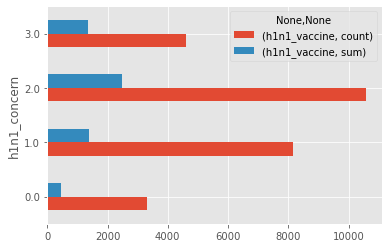

In [7]:
training_data.groupby(['h1n1_concern']).agg({'h1n1_vaccine': ['count','sum']}).plot.barh(legend = True)
#   ? does this make sense?

In [8]:
rate = training_data.groupby(['h1n1_concern','income_poverty']).agg({'h1n1_vaccine': ['mean']})

In [9]:
rate

h1n1_vaccine
                                               mean
h1n1_concern income_poverty                        
0.0          <= $75,000, Above Poverty     0.121951
             > $75,000                     0.180617
             Below Poverty                 0.126404
1.0          <= $75,000, Above Poverty     0.156666
             > $75,000                     0.206022
             Below Poverty                 0.171429
2.0          <= $75,000, Above Poverty     0.226030
             > $75,000                     0.278969
             Below Poverty                 0.178947
3.0          <= $75,000, Above Poverty     0.300346
             > $75,000                     0.353808
             Below Poverty                 0.244048

<AxesSubplot:title={'center':'Vaccine Rates Among Groups of Poverty and Concern'}, ylabel='h1n1_concern,income_poverty'>

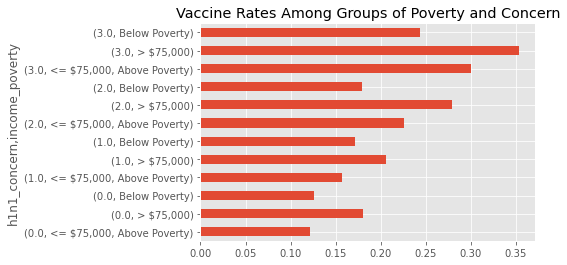

In [10]:
training_data.groupby(['h1n1_concern','income_poverty']).agg({'h1n1_vaccine': ['mean']}).plot.barh(legend =None, title = 'Vaccine Rates Among Groups of Poverty and Concern')

In [11]:
#rate.reindex(index = ([1.0, 2.0, 3.0, 4.0],['Below Poverty','<= $75,000, Above Poverty','> $75,000']))

<AxesSubplot:title={'center':'Vaccine Rates Among Groups of Poverty and Knowledge'}, ylabel='h1n1_knowledge,income_poverty'>

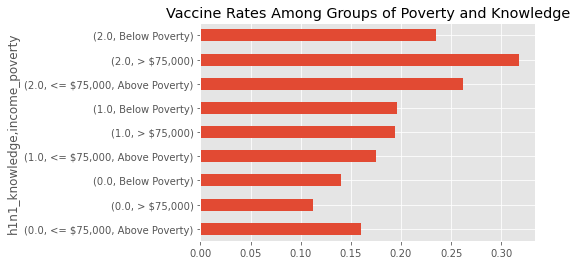

In [12]:
training_data.groupby(['h1n1_knowledge','income_poverty']).agg({'h1n1_vaccine': ['mean']}).plot.barh(legend =None, title = 'Vaccine Rates Among Groups of Poverty and Knowledge')

<AxesSubplot:title={'center':'Vaccine Rates Among Groups of Avoidance and Belief of Effectiveness'}, ylabel='behavioral_avoidance,opinion_seas_vacc_effective'>

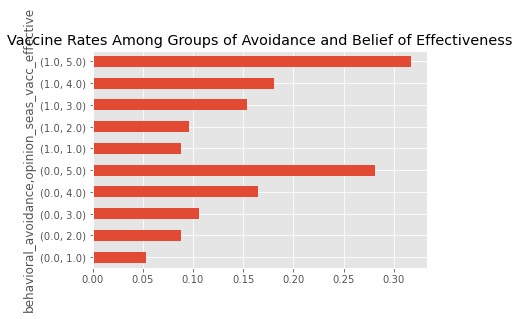

In [13]:
training_data.groupby(['behavioral_avoidance','opinion_seas_vacc_effective']).agg({'h1n1_vaccine': ['mean']}).plot.barh(legend =None, title = 'Vaccine Rates Among Groups of Avoidance and Belief of Effectiveness')

In [14]:
regressor_adjusted = training_data

**Numerical Ranking of Categorical Variables**

In [15]:
regressor_adjusted['age_group'] = regressor_adjusted['age_group'].replace('18 - 34 Years',1).replace('35 - 44 Years',2)\
                                 .replace('45 - 54 Years',3).replace('55 - 64 Years',4).replace('65+ Years',5)
regressor_adjusted['education'] = regressor_adjusted['education'].replace('< 12 Years',1).replace('12 Years',2)\
                                  .replace('College Graduate',4).replace('Some College',3)
regressor_adjusted['sex'] = regressor_adjusted['sex'].replace('Male',0).replace('Female',1)
regressor_adjusted['income_poverty'] = regressor_adjusted['income_poverty'].replace('Below Poverty',1).replace\
                                        ('<= $75,000, Above Poverty',2).replace('> $75,000',3)
regressor_adjusted['marital_status'] = regressor_adjusted['marital_status'].replace('Not Married',0).replace('Married',1)
regressor_adjusted['employment_status'] = regressor_adjusted['employment_status'].replace('Not in Labor Force',0).\
                                           replace('Unemployed',1).replace('Employed',2)
regressor_adjusted['census_msa'] = regressor_adjusted['census_msa'].replace('Non-MSA',0).replace('MSA, Not Principle  City'\
                                   ,1).replace('MSA, Principle City',2)
regressor_adjusted['rent_or_own'] = regressor_adjusted['rent_or_own'].replace('Rent',0).replace('Own',1)

**One Hot Encoding for Non-Rankable Categorical Variables**

In [16]:
OneHotEncoder(
    categories = 'auto',
    drop = None,
    sparse = True,
    dtype = 'numpy.float64',
    handle_unknown = 'error'
)

ohe = OneHotEncoder()

In [17]:
encoded_employment_industry = ohe.fit_transform(regressor_adjusted[['employment_industry']]).toarray()
encoded_employment_industry_titles = ohe.categories_[0]
regressor_adjusted[encoded_employment_industry_titles] = encoded_employment_industry
regressor_adjusted = regressor_adjusted.drop(['employment_industry'], axis = 1)

In [18]:
encoded_race = ohe.fit_transform(regressor_adjusted[['race']]).toarray()
encoded_race_titles = ohe.categories_[0]
regressor_adjusted[encoded_race_titles] = encoded_race
regressor_adjusted = regressor_adjusted.drop(['race'],axis = 1)

In [19]:
encoded_region = ohe.fit_transform(regressor_adjusted[['hhs_geo_region']]).toarray()
encoded_region_titles = ohe.categories_[0]
regressor_adjusted[encoded_region_titles] = encoded_region
regressor_adjusted = regressor_adjusted.drop(['hhs_geo_region'],axis = 1)

In [20]:
encoded_employment_occupation = ohe.fit_transform(regressor_adjusted[['employment_occupation']]).toarray()
encoded_employment_occupation_titles = ohe.categories_[0]
regressor_adjusted[encoded_employment_occupation_titles] = encoded_employment_occupation
regressor_adjusted = regressor_adjusted.drop(['employment_occupation'],axis=1)

In [21]:
regressor_adjusted = regressor_adjusted.drop(['health_insurance'], axis=1)

**Dealing with Null Values**

In [22]:
regressor_adjusted.isnull().sum()

respondent_id         0
h1n1_vaccine          0
seasonal_vaccine      0
h1n1_concern         92
h1n1_knowledge      116
                   ... 
vlluhbov              0
xgwztkwe              0
xqwwgdyp              0
xtkaffoo              0
xzmlyyjv              0
Length: 92, dtype: int64

In [23]:
def ReplaceNullWithMean(DataFrame,x):
    i=0
    while (i<len(x)):
        DataFrame[x[i]] = DataFrame[x[i]].replace(np.NaN, DataFrame[x[i]].mean())
        i= i+1

In [24]:
null1 = regressor_adjusted[regressor_adjusted.columns[regressor_adjusted.isnull().any()]]

In [25]:
null1.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'education',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'household_adults', 'household_children'],
      dtype='object')

In [26]:
ReplaceNullWithMean(regressor_adjusted,null1.columns)

In [27]:
null1 = regressor_adjusted[regressor_adjusted.columns[regressor_adjusted.isnull().any()]]

In [28]:
null1.columns

Index([], dtype='object')

In [29]:
regressor_adjusted.shape

(26707, 92)

**Regressor Creation**

In [30]:
h1n1_y = regressor_adjusted.loc[:,'h1n1_vaccine']
h1n1_X = regressor_adjusted.drop(['h1n1_vaccine'], axis = 1).drop(['seasonal_vaccine'], axis = 1)
h1n1_X_train, h1n1_X_test, h1n1_y_train, h1n1_y_test = train_test_split(h1n1_X, h1n1_y, test_size = 0.20)
h1n1_regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
h1n1_regressor.fit(h1n1_X_train, h1n1_y_train)
h1n1_y_pred = h1n1_regressor.predict(h1n1_X_test)

C:\Users\Isabe\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Isabe\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [31]:
seasonal_y = regressor_adjusted.loc[:,'seasonal_vaccine']
seasonal_X = regressor_adjusted.drop(['h1n1_vaccine'], axis = 1).drop(['seasonal_vaccine'], axis = 1)
seasonal_X_train, seasonal_X_test, seasonal_y_train, seasonal_y_test = train_test_split(seasonal_X, seasonal_y, test_size = 0.20)
seasonal_regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
seasonal_regressor.fit(seasonal_X_train, seasonal_y_train)
seasonal_y_pred = seasonal_regressor.predict(seasonal_X_test)

C:\Users\Isabe\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Isabe\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


**Performance of Regressors**

In [32]:
print('H1N1 Mean Absolute Error:', metrics.mean_absolute_error(h1n1_y_test,h1n1_y_pred))
print('H1N1 Mean Squared Error:', metrics.mean_squared_error(h1n1_y_test,h1n1_y_pred))
print('H1N1 Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(h1n1_y_test,h1n1_y_pred)))
print('===============================================================================')
print('Seasonal Mean Absolute Error:', metrics.mean_absolute_error(seasonal_y_test,seasonal_y_pred))
print('Seasonal Mean Squared Error:', metrics.mean_squared_error(seasonal_y_test,seasonal_y_pred))
print('Seasonal Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(seasonal_y_test,seasonal_y_pred)))

H1N1 Mean Absolute Error: 0.24043429427180832
H1N1 Mean Squared Error: 0.12489142643204791
H1N1 Root Mean Squared Error: 0.3533998110243523
Seasonal Mean Absolute Error: 0.31736241108199176
Seasonal Mean Squared Error: 0.16820619618120555
Seasonal Root Mean Squared Error: 0.4101294870906084


**Prep Data for Test**

In [47]:
test_set = test_set_features

In [48]:
test_set['age_group'] = test_set['age_group'].replace('18 - 34 Years',1).replace('35 - 44 Years',2)\
                                 .replace('45 - 54 Years',3).replace('55 - 64 Years',4).replace('65+ Years',5)
test_set['education'] = test_set['education'].replace('< 12 Years',1).replace('12 Years',2)\
                                  .replace('College Graduate',4).replace('Some College',3)
test_set['sex'] = test_set['sex'].replace('Male',0).replace('Female',1)
test_set['income_poverty'] = test_set['income_poverty'].replace('Below Poverty',1).replace\
                                        ('<= $75,000, Above Poverty',2).replace('> $75,000',3)
test_set['marital_status'] = test_set['marital_status'].replace('Not Married',0).replace('Married',1)
test_set['employment_status'] = test_set['employment_status'].replace('Not in Labor Force',0).\
                                           replace('Unemployed',1).replace('Employed',2)
test_set['census_msa'] = test_set['census_msa'].replace('Non-MSA',0).replace('MSA, Not Principle  City'\
                                   ,1).replace('MSA, Principle City',2)
test_set['rent_or_own'] = test_set['rent_or_own'].replace('Rent',0).replace('Own',1)

encoded_employment_industry = ohe.fit_transform(test_set[['employment_industry']]).toarray()
encoded_employment_industry_titles = ohe.categories_[0]
test_set[encoded_employment_industry_titles] = encoded_employment_industry
test_set = test_set.drop(['employment_industry'], axis = 1)


encoded_race = ohe.fit_transform(test_set[['race']]).toarray()
encoded_race_titles = ohe.categories_[0]
test_set[encoded_race_titles] = encoded_race
test_set = test_set.drop(['race'],axis = 1)

encoded_region = ohe.fit_transform(test_set[['hhs_geo_region']]).toarray()
encoded_region_titles = ohe.categories_[0]
test_set[encoded_region_titles] = encoded_region
test_set = test_set.drop(['hhs_geo_region'],axis = 1)

encoded_employment_occupation = ohe.fit_transform(test_set[['employment_occupation']]).toarray()
encoded_employment_occupation_titles = ohe.categories_[0]
test_set[encoded_employment_occupation_titles] = encoded_employment_occupation
test_set = test_set.drop(['employment_occupation'],axis=1)

test_set = test_set.drop(['health_insurance'], axis=1)

In [49]:
print(test_set.columns.get_loc( 'xqicxuve'))
print(test_set.columns.get_loc( 'Black'))

51
53


In [50]:
null2 = test_set[test_set.columns[test_set.isnull().any()]]

In [51]:
ReplaceNullWithMean(test_set,null2.columns)

In [52]:
null2 = test_set[test_set.columns[test_set.isnull().any()]]

In [53]:
null2.columns

Index([], dtype='object')

In [54]:
#test_set=test_set.drop(test_set.columns[52], axis=1)

In [55]:
test_set.shape

(26708, 90)

In [56]:
test_h1n1 = h1n1_regressor.predict(test_set)
test_seasonal = seasonal_regressor.predict(test_set)

C:\Users\Isabe\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Isabe\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [57]:
test_h1n1

array([0.2 , 0.15, 0.4 , ..., 0.3 , 0.35, 0.4 ])

In [58]:
test_seasonal

array([0.3 , 0.2 , 0.65, ..., 0.35, 0.45, 0.6 ])

In [59]:
submission = test_set_features['respondent_id']

In [60]:
submission = pd.DataFrame().assign(respondent_id=test_set_features['respondent_id'], h1n1_vaccine=test_h1n1, seasonal_vaccine=test_seasonal )

In [61]:
submission

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.20,0.30
1,26708,0.15,0.20
2,26709,0.40,0.65
3,26710,0.35,0.95
4,26711,0.60,0.35
...,...,...,...
26703,53410,0.45,0.25
26704,53411,0.40,0.60
26705,53412,0.30,0.35
26706,53413,0.35,0.45


In [62]:
submission.to_csv(r'C:\Users\Isabe\submission1.csv', index=False)